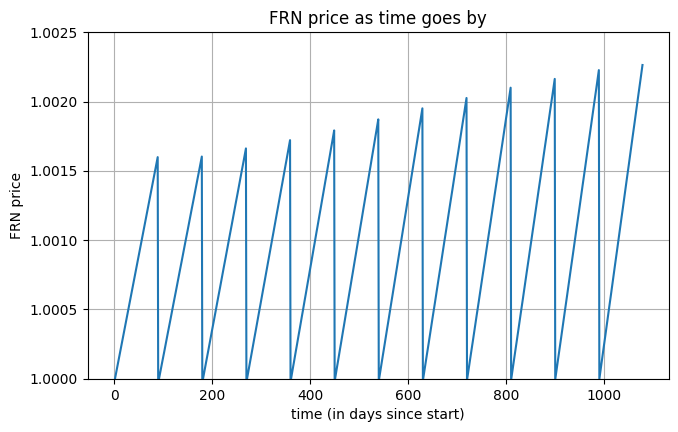

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

str_zero = {"month":[3,6,9,12,15,18,21,24,27,30,33,36],
            "zero":[0.0065946,0.0068195,0.0070484,0.0073195,0.0076309,0.0079416,0.0082324,0.0085225,0.0087675,0.0090129,0.0092574,0.0095033]}

df_raw = pd.DataFrame(str_zero)

k = 4
frn_price = []

for t in np.arange(0, 36 - 1/30, 1/30):
    df = df_raw.copy()
    df['mat'] = (df['month'] - t) / 12
    df['tau'] = df['mat']
    df.loc[1:, 'tau'] = df['mat'].iloc[1:].values - df['mat'].iloc[:-1].values
    df['df'] = np.exp(-df['zero'] * df['mat'])
    df['fd'] = df['zero']
    df.loc[1:, 'fd'] = (np.log(df['df'].iloc[:-1].values) - np.log(df['df'].iloc[1:].values)) / df['tau'].iloc[1:].values

    if int(round(t * 30)) % 3 == 0:
        r_reset = df.loc[df['mat'] > 0, 'fd'].iloc[0]
        df['cf'] = df['fd'] / k
    else:
        df['cf'] = df['fd'] / k

    first_positive_maturity_index = df[df['mat'] > 0].index[0]
    df.loc[first_positive_maturity_index, 'cf'] = r_reset / k

    df.loc[df.index[-1], 'cf'] = 1 + df.loc[df.index[-1], 'cf']

    frn_price_t = (df['df'] * df['cf'] * (df['mat'] > 0)).sum()
    frn_price.append(frn_price_t)

plt.figure(figsize=(7.5, 4.5))
plt.plot(frn_price)
plt.xlabel("time (in days since start)")
plt.ylabel("FRN price")
plt.title("FRN price as time goes by")
plt.ylim(1, 1.0025)
plt.grid(True)
plt.show()